In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#load the dataset
fruits=pd.read_table(r"F:\ML-DATA MINING\coursera_course_applied_ml_using_python\course3_downloads\fruit_data_with_colors.txt")
print(type(fruits))

<class 'pandas.core.frame.DataFrame'>


In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.shape

(59, 7)

In [4]:
lookup_fruit_name=dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Create a Train Test split

In [5]:
X=fruits[['mass','width','height']]
y=fruits['fruit_label']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)#75% train and 25% test by default

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44, 3)
(15, 3)
(44,)
(15,)


<IPython.core.display.Javascript object>


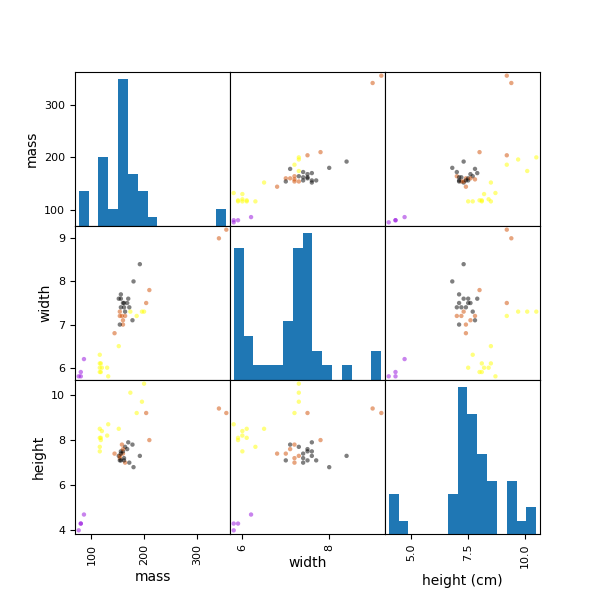

In [7]:
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
scatter=pd.plotting.scatter_matrix(X_train,c=y_train,
                          s=40,hist_kwds={'bins':15},figsize=(6,6),cmap=cmap)

# K-Nearest Neighbors Classification

used for classification and regression

algorithm:
1. find the most similar instances (call them X_NN) to x_test that are in X_train.
2. Get the labels y_NN for the instances in X_NN
3. Predict the label for x_test by combining the labels y_NN e.g. simple majority vote.

KNN needs 4 things specified:
1. A distance metric -> Typically Euclidean(Minkowski with p=2)
2. How many nearest neighbors to look at?( value of K , generally 5)
3. Optional weighting function on the neighbor points
4. Method for aggregating the classes of neighbor points.-->(based on majority of votes)


notes:
1. if k is very small (e.g k=1) our model shuld be overfitted with the data and give us high varience of boundary.



In [8]:
# create a  classifier object
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
# estimates the accuracy of the classifier on future data, using the test data
knn.score(X_test,y_test)

0.5333333333333333

In [10]:
# Use the trained k-NN classifire model to classify new. previously unseen objects
fruit_prediction= knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [11]:
fruit_prediction= knn.predict([[100,6.3,8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [17]:
# plot the decision boundaries of the k-NN classifier
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf =KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])


<IPython.core.display.Javascript object>


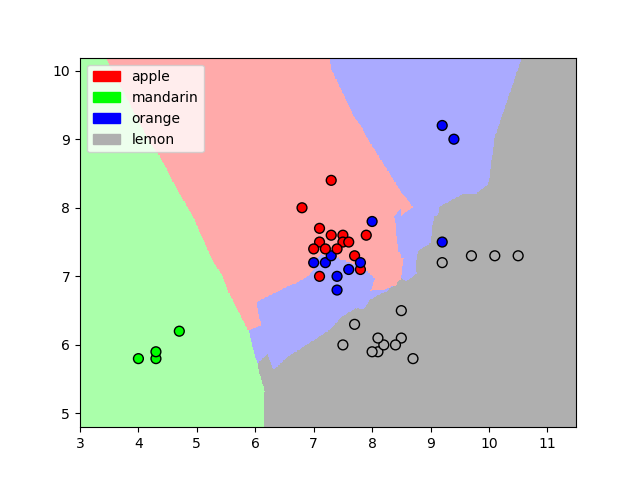

In [18]:
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
#plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

<IPython.core.display.Javascript object>


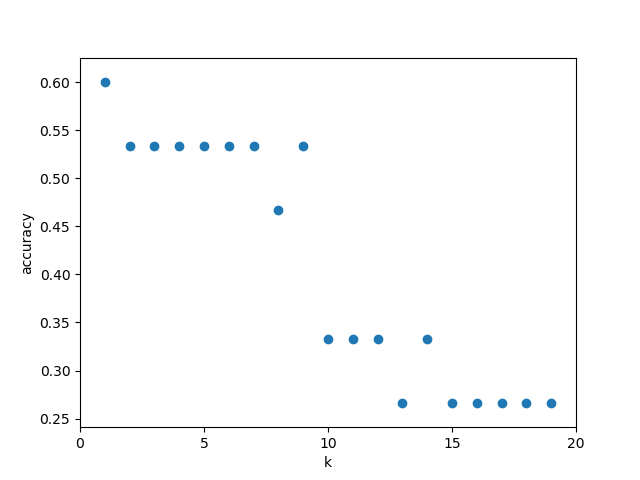

In [19]:
#how sensitive is k-NN classifier accuracy to the choice of the 'k' parameter?
k_range=range(1,20)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.figure()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20]);

Overfitting and Underfitting

--> models that are too complex for the amount of training data available
    are said to OVERFIT and are not likely to generalize well to new examples.
    
--> models that are too simple, that don't even do well on the training 
    data,are said to UNDERFIT  and also not likely to generalize well.



In [ ]:
#knn regression
from sklearn.neighbors import KNeighborsRegressor

X_train,X_test,y_train,y_test=train_test_split(X_R1,y_R1,random_state=0)
knnreg=KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test,y_test)))
'''
why R-squared regression score?
--> it will measures how well a prediction model for regression fits 
the given data.
--> the score is between 0 and 1
    0 means - a constant model that predicts the mean value of all training target values
    1 means - perfect prediction.
--> Also known as "coefficient of determination".

    

# LINEAR REGRESSION : LEAST-SQUARES

In [ ]:
'''
A linear model is a sum of weighted variables that predicts a target output
value given an input data instance.
e.g. predicting housing price

input--> x = (x0,x1,x2....,xn), where x is feature vector.
output--> y = w0x0 + w1x1 + ..... wnxn + b , where b is bias/y-intercept.

* Least square linear reg.
--> finds "w" and "b" that minimize the mean squared error of the model:
    MSE: sum of squared diff between predicted target values and actual target values
--> most popular way to find out the values of "w" and "b".
'''
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test=train_test_split(X_R1,y_R1,random_state=0)
linreg=LinearRegression().fit(X_train,y_train)

print("linear model intercept (b):{}".format(linreg.intercept_))
print("linear model coeff (w):{}".format(linreg.coef_))
print("R-squared score (training):{:.3f}".format(linreg.score(X_train,y_train)))
print("R-squared score (testing):{:.3f}".format(linreg.score(X_test,y_test)))

# an object's attributes ends with '_' (ex. coef_) , that means it derived from training dataset
# plotting linear regression:
plt.figure(figsize=(5,4))
plt.scatter(X_R1,Y_R1,marker='-o',s=50,alpha=0.8)
plt.plot(X_R1,linreg.coef_*X_R1+linreg.intercept_,'r-')
plt.title('Least Squraed Linear regression')
plt.xlabel('Feature value(x)')
plt.ylabel('Target value(y)')
plt.show()


    

# Linear Regression: Ridge, Lasso, and Polynomial Regression

In [ ]:
'''
1. ridge regression
--> it learns w and b using the same least squared criterion but adds a 
    penalty for large variations in "W" parameters. Once the parameters are
    learned , the ridge regression prediction formula is the same as ordinary
    least squared regression.
--> here penalty is called "Regularization". Regularization prevents overfitting
    by restricting the model, typically to reduce its complexity.
--> it uses " L2 Regularization" : minimize sum of squares of "W" entries.
--> the influence of the regularization term is controlled by the "alpha" parameter.
--> Higher alpha means more regularization and simpler models.
    default setting for alpha is 1.0
'''

from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test=train_test_split(X_R1,y_R1,random_state=0)
linridge=Ridge(alpha=20.0).fit(X_train,y_train)
print("Ridge reg linear model intercept (b):{}".format(linridge.intercept_))
print("Ridge reg linear model coeff (w):{}".format(linridge.coef_))
print("Ridge reg R-squared score (training):{:.3f}".format(linridge.score(X_train,y_train)))
print("Ridge reg R-squared score (testing):{:.3f}".format(linridge.score(X_test,y_test)))
print("Number of non-zero features: {}".format(np.sum(linridge.coef_!=0)))



# The need for Feature Normalization

In [ ]:
'''
--> Important for some machine learning methods that all features are on 
    the same scale(e.g. faster convergence in learning , more uniform or 'fair'
    influence for all weights).
    ex. regularized regression, k-NN, SVM,Neural Networks..
-->for each feature: x'=(x-min(x))/(max(x)-min(x)).
    it is called min-max scalling.
'''
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
x_train_scaled=scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)
clf=Ridge().fit(x_train_scaled,y_train)
r2_score=clf.score(x_test_scaled,y_test)

'''
Note : it can be more efficient to do fitting and transforming together
        on the training set using the fit_transform method.
'''
scaler= MinMaxScaler()
x_train_scaled=scaler.fit_transform(X_train)

In [ ]:
#ridge regression with feature normalization
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

X_train,X_test,y_train,y_test=train_test_split(X_R1,y_R1,random_state=0)
linridge=Ridge(alpha=20.0).fit(X_train,y_train)
print("Ridge reg linear model intercept (b):{}".format(linridge.intercept_))
print("Ridge reg linear model coeff (w):{}".format(linridge.coef_))
print("Ridge reg R-squared score (training):{:.3f}".format(linridge.score(x_train_scaled,y_train)))
print("Ridge reg R-squared score (testing):{:.3f}".format(linridge.score(x_test_scaled,y_test)))
print("Number of non-zero features: {}".format(np.sum(linridge.coef_!=0)))

# ridge regression with regularization parameter : alpha
print("Ridgr Regression : effect of alpha regularization parameter\n")
for this_alpha in[0,1,10,20,50,100,1000]:
    linridge=Ridge(alpha=this_alpha).fit(x_train_scaled,y_train)
    r2_train=linridge.score(x_train_scaled,y_train)
    r2_test=linridge.score(x_test_scaled,y_test)
    num_coeff_bigger=np.sum(abs(linridge.coef_)>1.0)
    print('alpha ={:.2f}\n\num abs(coeff) > 1.0 :{},\r-squared training :{:.2f},r-squared test:{:.2f}\n'
          .format(this_alpha,num_coeff_bigger,r2_train,r2_test))

In [ ]:
# LASSO REGRESSSION
'''
--> it uses "L1 regularization" penalty for training instead of L2.
--> L1 penalty : minimize the sum of the absolute values of the coefficient.
--> this has the effect of setting parameter weights in "w" to zero for the least 
    influential variables. this is called a "SPARSE SOLUTION" : a kind of feature selection.

==>> WHEN TO USE RIDGE VS. LASSO REGRESSION:
1. many small/medium sized effects : Ridge
2. Only a few variables with medium/large effect : Lasso.
'''
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

X_train,X_test,y_train,y_test=train_test_split(X_R1,y_R1,random_state=0)
linlasso=Lasso(alpha=2.0,max_iter=10000).fit(X_train,y_train)
print("Ridge reg linear model intercept (b):{}".format(linlasso.intercept_))
print("Ridge reg linear model coeff (w):{}".format(linlasso.coef_))
print("Ridge reg R-squared score (training):{:.3f}".format(linlasso.score(x_train_scaled,y_train)))
print("Ridge reg R-squared score (testing):{:.3f}".format(linlasso.score(x_test_scaled,y_test)))
print("Number of non-zero features: {}".format(np.sum(linlasso.coef_!=0)))

# lasso regression with regularization parameter : alpha
print("Ridgr Regression : effect of alpha regularization parameter\n")
for this_alpha in[0.5,1,2,3,5,10,20,50]:
    linlasso=(alpha=this_alpha,max_iter=10000).fit(x_train_scaled,y_train)
    r2_train=linlasso.score(x_train_scaled,y_train)
    r2_test=linlasso.score(x_test_scaled,y_test)
    num_coeff_bigger=np.sum(abs(linlasso.coef_)>1.0)
    print('alpha ={:.2f}\n\num abs(coeff) > 1.0 :{},\r-squared training :{:.2f},r-squared test:{:.2f}\n'
          .format(this_alpha,num_coeff_bigger,r2_train,r2_test))

# Polynomial Features with Linear Regression

In [ ]:
'''
Generate new features consisting of all polinomial combinations of the 
original two features (x0,x1)
--> The degree of the polynomial specify how many variables participate
    at a time in each new feature.
    
* WHY WE WANT TO TRANSFORM OUR DATA THIS WAY?
--> to capture interaction between the original features by adding them as 
    features to the linear model.
--> to make a classification problem easier

--> More generally, we can apply other non-linear transformations to create 
    new features.
--> Beware of polynomial feature expansion with high degree, as this can 
    lead to complex model that overfit, Thus, polynomial feature expansion
    is often combined with a regularized learning method like ridge regression.
    
'''
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train,X_test,y_train,y_test=train_test_split(X_F1,y_F1,random_state=0)
linreg=LinearRegression().fit(X_train,y_train)

print("linear model intercept (b):{}".format(linreg.intercept_))
print("linear model coeff (w):{}".format(linreg.coef_))
print("R-squared score (training):{:.3f}".format(linreg.score(X_train,y_train)))
print("R-squared score (testing):{:.3f}".format(linreg.score(X_test,y_test)))

print('now we transform the original input data to add polynomial features up to degree 2')
poly=PolynomialFeatures(degree=2)
X_F1_poly=poly.fit_transform(X_F1)
X_train,X_test,y_train,y_test=train_test_split(X_F1_poly,y_F1,random_state=0)
linreg=LinearRegression().fit(X_train,y_train)
print("(poly deg 2)linear model intercept (b):{}".format(linreg.intercept_))
print("(poly deg 2)linear model coeff (w):{}".format(linreg.coef_))
print("(poly deg 2)R-squared score (training):{:.3f}".format(linreg.score(X_train,y_train)))
print("(poly deg 2)R-squared score (testing):{:.3f}".format(linreg.score(X_test,y_test)))


# Logistic Regression

In [ ]:
'''
used for classification problem

*HOW IT WORKS?
--> The logistic function transform real-valued input to an output num ber y between 
    0 and 1, intercepted as the probability the input object to the positive
    class, given as its input features(x0, x1,x2....xn )
    
--> L2 regularization is 'on' by default(like ridge regression)
--> parameter C controls amount of regularization (default 1.0)
--> As with regularized linear regression, it can be important to 
    normalize all features so that they are on the same scale.
    
'''


"find out code by your self."

from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X_F1,y_F1,random_state=0)
logreg=LogisticRegression().fit(X_train,y_train)

print("accuracy (training):{:.3f}".format(logreg.score(X_train,y_train)))
print("accuracy (testing):{:.3f}".format(logreg.score(X_test,y_test)))


# SUPPORT VECTOR MACHINES

In [ ]:
'''
classifier margin : Defined as the maximum width the dicision boundary area can be increased 
                    before hitting a data point.
*LSVM : Linear Support Vector Machine.
--> The linear classifier with maximum margin is a linear support vector machine.

* Regularization for SVMs: the C parameter
--> The strength of regularization is determined by C
--> Larger values of C : Less regularization
    -- Fit the training data as well as possible
    -- Each individual data points is important to classify correctly
--> Smaller values of C: More regularization
    -- More tolerant of errors on individual data points.

'''
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from asdpy_shared_utilities import (plot_class_regions_for_classifier_subplot)

X_train,X_test,y_train,y_test=train_test_split(X_F1,y_F1,random_state=0)
# fig, subaxes = plt.subplots(1,1,figsize=(7,5))
# this_C= 1.0
# clf= SVC(kernel = 'Linear', C=this_C).fit(X_train,y_train)
# title='Linear SVC, C ={:.3f}'.format(this_C)
# plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,title,subaxes)
clf=LinearSVC().fit(X_train,y_train)
print("training acc: {:.3f}".format(clf.score(X_train,y_train)))
print("testing acc: {:.3f}".format(clf.score(X_test,y_test)))


# Linear model pros and cons


PROS:

1. Simple and easy to learn.
2. Fast prediction.
3. Scale well to very large Dataset.
4. Works well with sparse data.
5. Reasons for prediction are relatively easy to interpret.

CONS:

1. For lower-dimension data, other models may have superior      generalization performance.
2. For classification, data may not be linearly separable        (more on this in SVMs with non-linear kernels).



# Multi class classification

In [ ]:
'''
Kernelized SVM:
--> powerful extension of linear SVM
--> SVM used for both classification and regression.
--> it takes input dataframe and transform it into much higher dimension feature space.
    -- we can do it by adding a second dimension/feature
        for ex. set the squared value of the first feature.
        for ex. mapping a 2D classification problem to 3D feature space to make it linearly separable.
* different tech. to transform the feature space.
1. Radial Bias Function Kernel
--> A kernel is a similarity measure(modified dot product) between data points.

Find Out Code by yourself. 

NOTE : NORMALIZE YOUR DATASET TO THE SAME SCALE BEFORE FEEDING THE DATA TO YOUR MODEL.
        IT'S HAVE SIGNIFICANT IMPACT ON MODEL ACCURACY.


'''

# KERNELIZED SUPPORT VECTOR MACHINE PROS AND CONS:

# PROS:

1. can perform well on range of dataset
2. Versatile: different kernel functions can be specified, or    custom kernel can be defined for specific data types.
3. Works well for both low and high-dimensional data.

CONS:

1. Efficiency (runtime speed and memory usage) descreases as      training set size increase(e.g. over 50000 samples)
2. Needs careful normalization of the input data and parameter    tuning.
3. Does not provide direct probability estimates( but can be      estimated using e.g. Platt scaling)
4. Difficult to interpret why a prediction was made.

* Model Complexity:
--> Kernel : Type of kernel function to be used
    -- Default = 'rbf' for radial basis function
    --Other types include 'Polynomial'
--> Kernel Parameter:
    -- gamma = RBF kernel width
--> C: regularization parameter
--> Typically C and gamma are tuned at the same time.

# CROSS - VALIDATION

In [ ]:
'''
* K-Fold cross validation :
--> our data divided into equally K parts. And then our model take one of them 
    as a testing and remaining as a training dataset. it will be done for each 
    and every partition and run the model and find accuracy.
--> for default setting , if K=5 then first take, first 20% of the data,
    as a testing, then take another 20% data as a testing and so on.

* Stratified Cross-Validation
--> if you are going to use default setting of cross validation then it may 
    be possible that first 20 % data which our model takes as a testing perpose,
    will be from the same class, that may lead to problem.
--> But with stratified cross validation, each folds contains a proportion of 
    classes that matches the overall dataset. Now all the classes will be fairly 
    represented in the test set.
    
* Leave one out cross validation
--> it will take first sample as test dataset and remaining for training, then second
    sample as test and remaining as training and so on.
--> large computation for large dataset but useful for small dataset.

'''
# cross- val example based on k-NN classifier with fruit datset(2 features) 

from sklearn.model_selection import cross_val_score
clf=KNeighborsClassifier(n_neighbors=5)
X=X_fruits_2d.as_matrix()
y=y_fruits_2d.as_matrix()
cv_score= cross_val_score(clf,X,y)

print('Cross-validation scores (3-fold):',cv_score)
print('Mean cross-val score (3-fold):{:.3f}'.format(np.mean(cv_score)))

'''
* Validation Curves show sensitivity to changes in an important parameter
--> 3-fold cross validation by default
--> The validation curve shows thw mean cross-validation accuracy for the 
    training and test sets as a function of the SVM parameter(gamma).It also 
    shows the variation around the mean as computed from k-fold cross-validation
    scores.
'''

# Decision trees

In [ ]:
'''
how you can splits?
--> with the use of INFORMATION GAIN

* how to control the model complexity means prevents overfitting
1. prepruning (sklearn only implements prepruning)
2. post pruning

* Feature Importance: How imporatant is a feature to overall prediction accuracy?
--> A number between 0 and 1 assigned to each feature
--> Feature importance of 0 means that feature is not used inn prediction.
--> Feature importance of 0 means that feature predicts the target perfectly.
--> All the feature importance are normalized to sum to 1.
find out code by your self.

* decision tree parameters:
1. max_depth --> controls max. depth(number of split points).
                Most common way to reduce tree complexity and iverfitting.
2. min_samples_leaf --> threshold for the minimum of the data instances a leaf 
                can have to avoid further splitting.
3. max_leaf_nodes --> limits total number of leaves in the tree.
In practice, adjusting only one of these (e.g. max_depth) is enough to reduce overfiting.
'''
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from asdpy_shared_utilities import (plot_class_regions_for_classifier_subplot)

X_train,X_test,y_train,y_test=train_test_split(X_F1,y_F1,random_state=3)

iris = load_iris()

clf=DecisionTreeClassifier(max_depth=4,min_samples_leaf=8,random_state=0).fit(X_train,y_train)
print("training acc: {:.3f}".format(clf.score(X_train,y_train)))
print("testing acc: {:.3f}".format(clf.score(X_test,y_test)))

# SETTING MAX DECISION TREE DEPTH TO HELP AVOID OVERFITTING.

clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
print("training acc: {:.3f}".format(clf2.score(X_train,y_train)))
print("testing acc: {:.3f}".format(clf2.score(X_test,y_test)))

'''
PROS OF DECISION TREE:

1. Easily visualized and interpreted.
2. No feature normalization or scaling typically needed.
3. Work well with datasets using a mixture of feature types(continuous, categorical, binary)

CONS OF DECISION TREE:

1.Even after tuning, decision trees can often still overfit.
2. usually need an ensemble of trees for better generalization performance.

'''

# EXAMPLE CODE OF DIFFRENT ALGORITHM

<IPython.core.display.Javascript object>


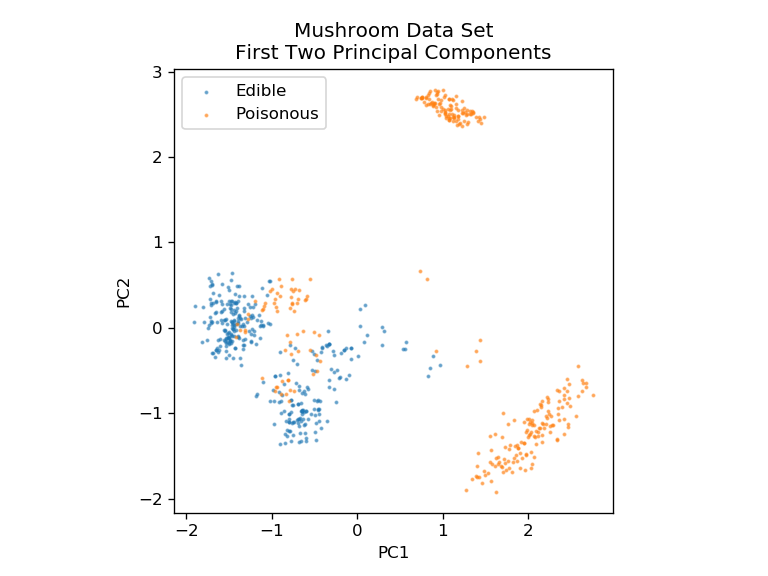

In [23]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"F:\ML-DATA MINING\coursera_course_applied_ml_using_python\course3_downloads\mushrooms.csv")
df2 = pd.get_dummies(df)

df3 = df2.sample(frac=0.08)

X = df3.iloc[:,2:]
y = df3.iloc[:,1]


pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [24]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


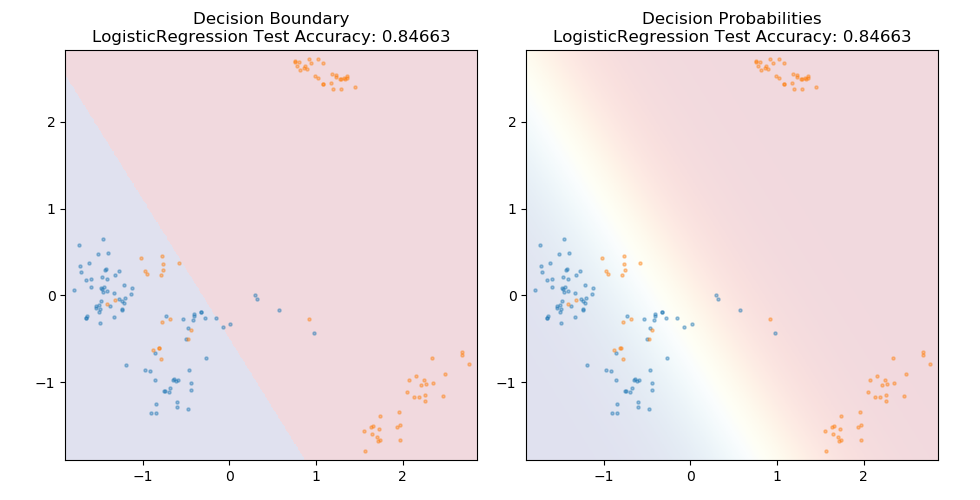

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


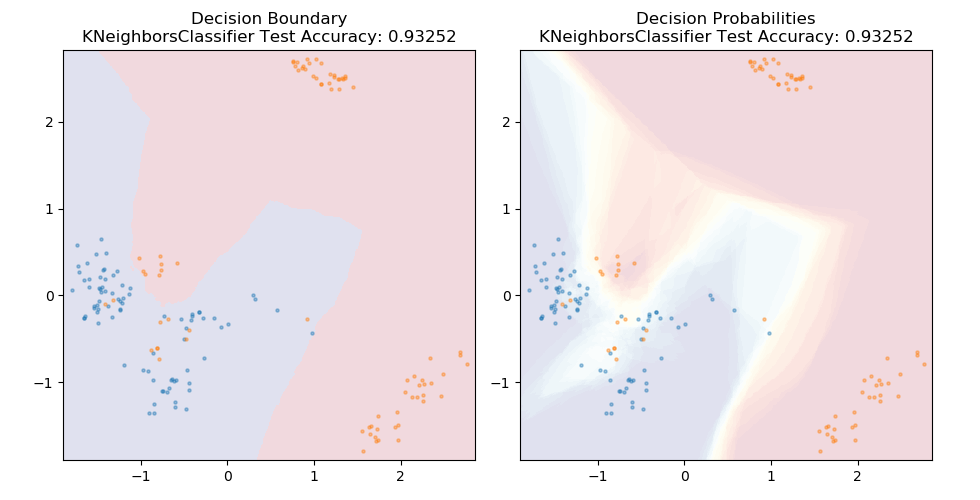

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


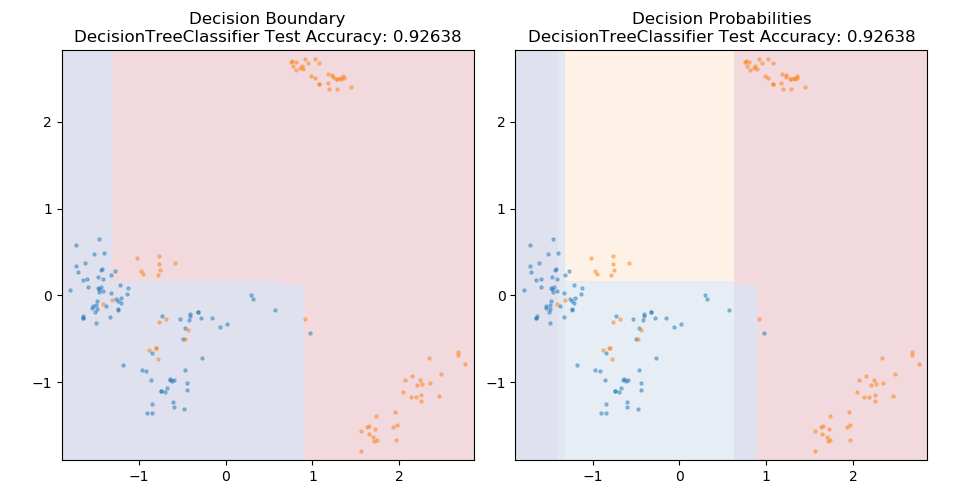

In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


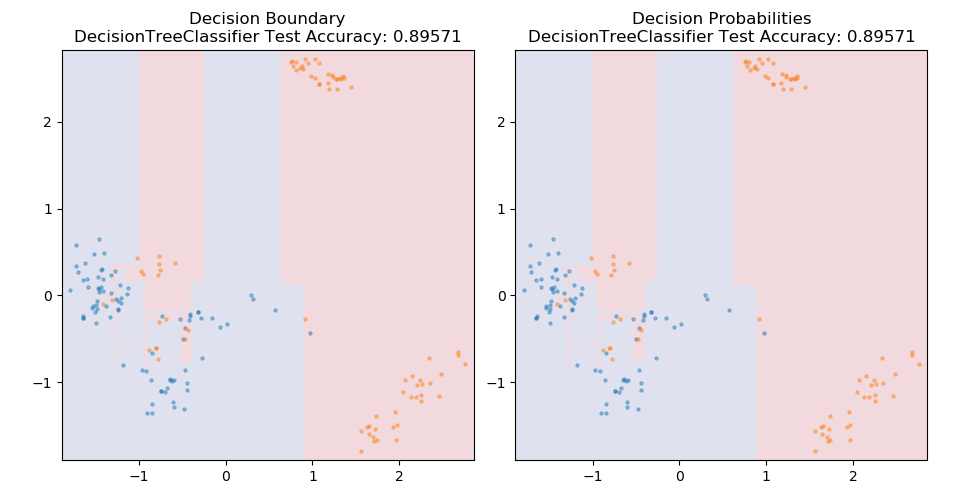

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<IPython.core.display.Javascript object>


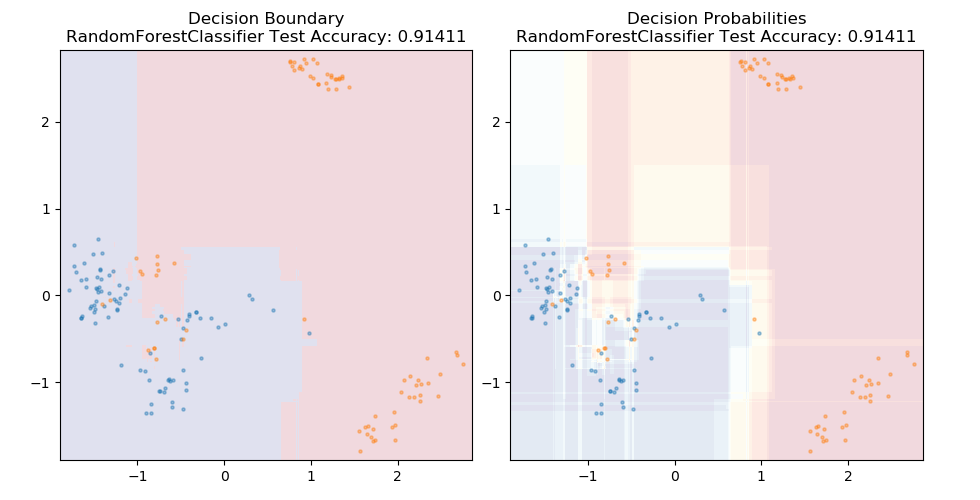

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


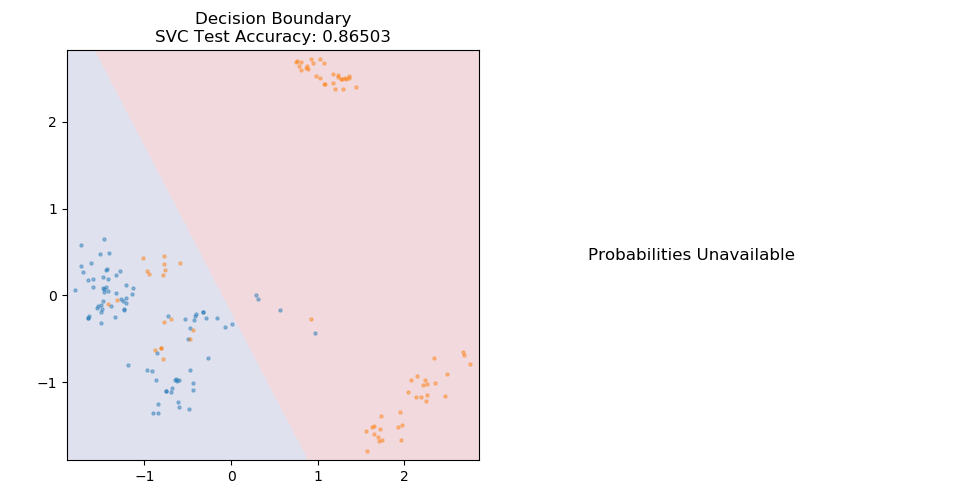

In [30]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


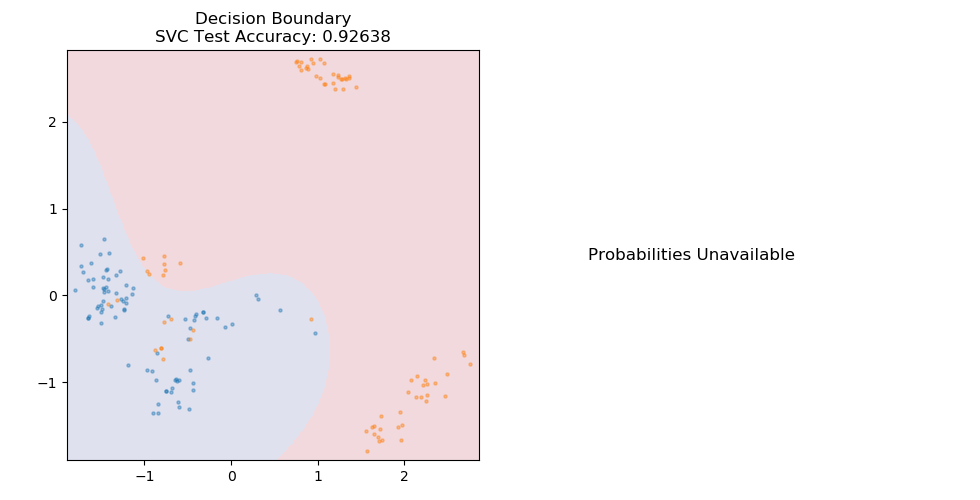

In [31]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


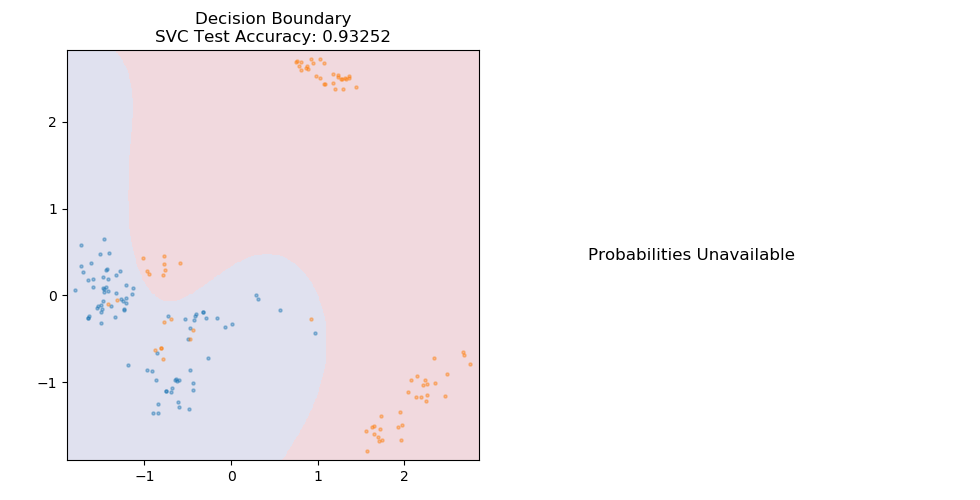

In [32]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


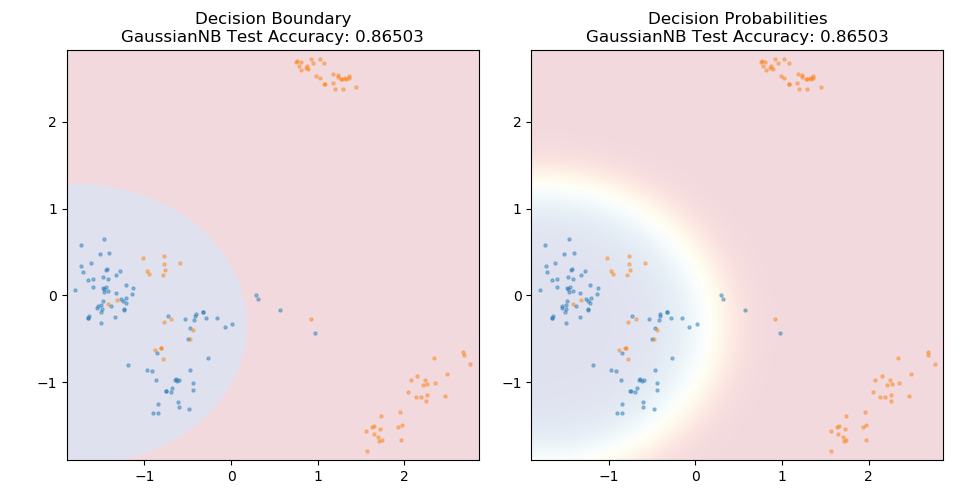

In [33]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


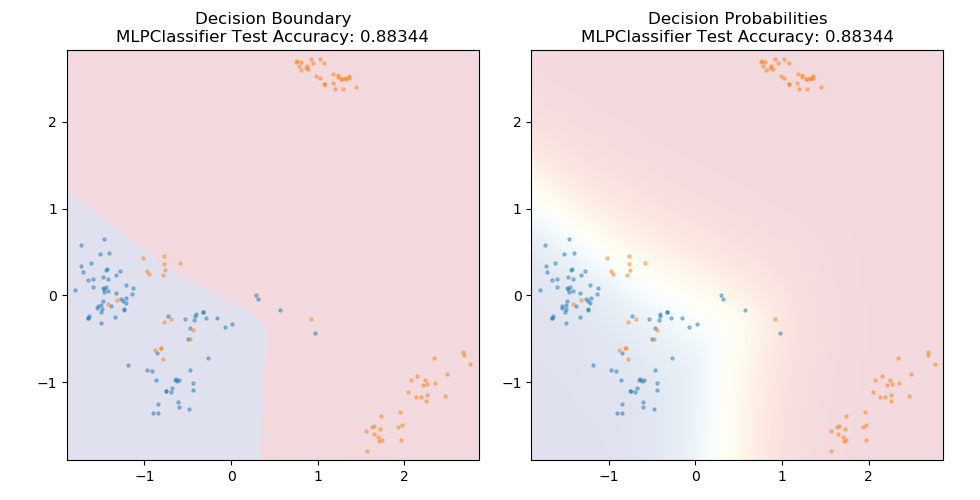

In [34]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

# MODEL EVALUATION AND SELECTION.

In [37]:
'''
--> Different applications have very different goals.
    for e.g. 1> User satisfaction (Web Search)
             2> Amount of revenue (e- commerce)
             3> Increase in patient survival rates (medical)
--> Compute your selected evaluation metric for multiple different models.
--> Then select the model with the best value of evaluation metric.

        ACCURACY = CORRECT PREDICTIONS / TOTAL INSTANCES

'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset= load_digits()
X,y =dataset.data,dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced!=1]=0
print('Original labels : ',y[1:30])
print('New binary labels : ',y_binary_imbalanced[1:30])

print(np.bincount(y_binary_imbalanced))

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180
Original labels :  [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels :  [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[1615  182]


In [40]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(X,y_binary_imbalanced,random_state=0)

svm=SVC(kernel='rbf',C=1,gamma='auto').fit(X_train,y_train)
svm.score(X_test,y_test)

0.9088888888888889

In [44]:
# DUMMY CLASSIFIER

from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
y_dummy_predictions = dummy_majority.predict(X_test)
print(y_dummy_predictions)
print(dummy_majority.score(X_test,y_test))
'''
Dummy classifier completely ignore the input data.
--> Dummy classifier serve as a sanity check on your classifier's performance.
--> They provide a null metric baseline.
--> Dummy classifier should not be used for real problems.
--> important commonly-used settings for strategy parameter:
    1. most_frequent
    2. stratified
    3. uniform
    4. constant(A major motivation of this method is F1- scoring, when
                the positive class is in the minority.)
==> WHAT IF MY CLASSIFIER ACCURACY IS CLOSE TO THE NULL ACCURACY BASELINE?
--> THIS COULD BE A SIGN OF:
    1.ineffective, erroneous or missing features
    2. Poor choice of kernel or hyperparameter
    3. Large class imbalance
'''

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
0.9044444444444445


In [ ]:
'''
****** DUMMY REGRESSOR....  *********

--> COUNTERPART of the Dummy classifier
--> strategy parameter options:
    1. mean : predicts the mean of the training targets.
    2. median : predicts the median of the training targets.
    3. quantile : predicts a user-provided quantile of the training targets.
    4. constant : predicts a constant user-provided value.
'''

# CONFUSION MATRICES

In [45]:
# BINARY (2- CLASS) CONFUSION MATRIX.

from sklearn.metrics import confusion_matrix
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,
                                                              y_train)

y_majority_predicted=dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test,y_majority_predicted)

print('Most frequent class (dummy classifier)\n',confusion)


Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [47]:
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train,y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion=confusion_matrix(y_test,y_classprop_predicted)
print('Random class-proportional prediction (dummy classfier)\n',confusion)

Random class-proportional prediction (dummy classfier)
 [[360  47]
 [ 37   6]]


In [49]:
svm= SVC(kernel='linear',C=1).fit(X_train,y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test,svm_predicted)
print('Support vector machine classifier (linear kernel, C=1)\n',confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [50]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression().fit(X_train,y_train)
lr_predicted = lr.predict(X_test)
confusion=confusion_matrix(y_test,lr_predicted)
print('Logistic reg. classifier (default setting)\n',confusion)

Logistic reg. classifier (default setting)
 [[401   6]
 [  6  37]]


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
tree_predicted = dt.predict(X_test)
confusion=confusion_matrix(y_test,tree_predicted)
print('Decison tree \n',confusion)

Decison tree 
 [[400   7]
 [ 17  26]]


In [54]:
'''
ACCURACY = (TN+TP)/(TN+TP+FN+FP).
CLASSIFICATION ERROR = (FN+FP)/(TN+TP+FN+FP)

RECALL (TRUE POSITIVE RATE, SENSITIVITY, PROBABILITY OF DETECTION):
      --> TP/(TP + FN).
      --> IT IS DEFINED AS A WHAT FRACTION  OF ALL POSITIVE INSTANCES 
          DOES THE CLASSIFIER CORRECTLY INDETIFY AS POSITIVE
PRECISION: WHAT FRACTION OF POSITIVE PREDICTION ARE CORRECT?
    --> PRECISION: TP / (TP+FP).

FALSE POSITIVE RATE (SPECIFITICITY): WHAT FRACTIONS OF ALL NEG. INSTANCES DOES THE 
                      CLASSIFIER INCORRECTLY INDENTIFY AS POSITIVE?
                 FPR: FP/(TN+FP).

F1-SCORE: combining precision and recall into a single number.
    F1= 2(dot)TP/2(dot)TP+FN+FP
  
F-SCORE : GENERALIZES F1 SCORE FOR COMBINING PRECISION & RECALL INTO A SINGLE NUMBER

'''

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy :{:.3f}'.format(accuracy_score(y_test,tree_predicted)))
print('precision : {:.2f}'.format(precision_score(y_test,tree_predicted)))
print('Recall : {:.2f}'.format(recall_score(y_test,tree_predicted)))
print('F1 : {:.2f}'.format(f1_score(y_test,tree_predicted)))

# print classification report....

from sklearn.metrics import classification_report
print(classification_report(y_test,tree_predicted,target_names=['not 1','1']))

Accuracy :0.947
precision : 0.79
Recall : 0.60
F1 : 0.68
              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [55]:
print('Random class-proportional (dummy)\n',
     classification_report(y_test,y_classprop_predicted,target_names=['not 1','1']))
print('svm : \n',
     classification_report(y_test,svm_predicted,target_names=['not 1','1']))
print('Logistic reg : \n',
     classification_report(y_test,lr_predicted,target_names=['not 1','1']))
print('Decision Tree :\n',
     classification_report(y_test,tree_predicted,target_names=['not 1','1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.91      0.88      0.90       407
           1       0.11      0.14      0.12        43

    accuracy                           0.81       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.83      0.81      0.82       450

svm : 
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic reg : 
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.86      0.86      0.86        43

    accuracy                           0.97       450
   macro avg       0.92      0.92      0.92       450
weighted avg  

# Classifier Decision Functions

In [59]:
'''
--> Each classifier score value per test point indicates how confidently
    the classifier predicts the positive class ( large magnitude positive values) or 
    the negative class ( large-magnitude negative values).
    
--> Choosing a fixed decision threshold gives a classification rule.
--> By sweeping the decision threshold through the entire range of positive
    score values, we get a series of classification outcomes that form a curve.
    

'''
X_train,X_test,y_train,y_test=train_test_split(X,y_binary_imbalanced,random_state=0)
y_scores_lr=lr.fit(X_train,y_train).decision_function(X_test)
y_score_list=list(zip(y_test[0:20],y_scores_lr[0:20]))
print(y_score_list)

'''
* PREDICT_PROBA FINCTION: PREDICTED PROBABILITY OF CLASS MEMBERSHIP
'''
X_train,X_test,y_train,y_test=train_test_split(X,y_binary_imbalanced,random_state=0)
y_proba_lr=lr.fit(X_train,y_train).predict_proba(X_test)
y_proba_list=list(zip(y_test[0:20],y_proba_lr[0:20,1]))
print(y_proba_list)

[(0, -23.176547400757663), (0, -13.541223742469006), (0, -21.72250047336062), (0, -18.907578437722535), (0, -19.736034587372778), (0, -9.749345951179265), (1, 5.23490021249531), (0, -19.30716117885968), (0, -25.101015601857377), (0, -21.827250934235906), (0, -24.150855663826746), (0, -19.576844844946265), (0, -22.574902551102674), (0, -10.823739601445064), (0, -11.912425566043064), (0, -10.97956652705531), (1, 11.205846086251944), (0, -27.645770221552823), (0, -12.859636015637092), (0, -25.848590145556187)]
[(0, 8.60108727067405e-11), (0, 1.3155903495453823e-06), (0, 3.6816111034009875e-10), (0, 6.1452989618944584e-09), (0, 2.683793414513379e-09), (0, 5.832940124078156e-05), (1, 0.9947008742687163), (0, 4.1210362715903745e-09), (0, 1.2553575357627774e-11), (0, 3.3154719959007555e-10), (0, 3.2465093048358345e-11), (0, 3.1469099051059103e-09), (0, 1.56980024484208e-10), (0, 1.992053353707062e-05), (0, 6.706507243234968e-06), (0, 1.70461945380572e-05), (1, 0.9999864056960567), (0, 9.85359

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Precision-recall and ROC curves

In [61]:
"-------------------"

'-------------------'

# Multi-Class Evaluation

<IPython.core.display.Javascript object>


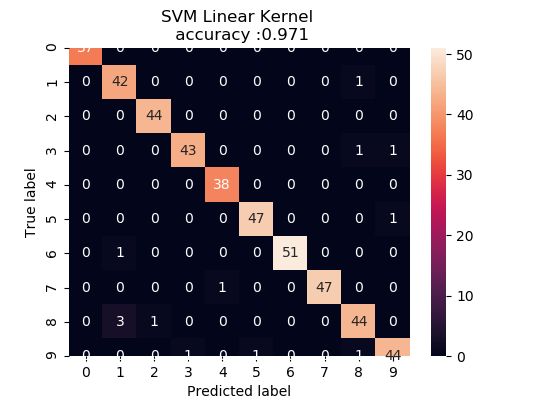

D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


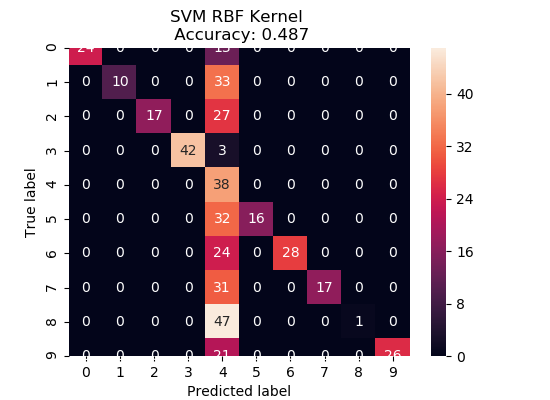

Text(0.5, 14.722222222222216, 'Predicted label')

In [63]:
'''
--> it is evaluation is an extension of the binary case.
    = A colllection of true vs predicted binary outcomes, onr per class.
    = Confusion matrices are especially useful.
    = Clssification report
'''

dataset =load_digits()
X,y = dataset.data, dataset.target
X_train_mc,X_test_mc,y_train_mc,y_test_mc=train_test_split(X,y,random_state=0)

svm =SVC(kernel ='linear').fit(X_train_mc,y_train_mc)
svm_predicted_mc=svm.predict(X_test_mc)
confusion_mc= confusion_matrix(y_test_mc,svm_predicted_mc)
df_cm=pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm,annot=True)
plt.title('SVM Linear Kernel \n accuracy :{:.3f}'
         .format(accuracy_score(y_test_mc,svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

svm = SVC(kernel = 'rbf').fit(X_train_mc,y_train_mc)
svm_predicted_mc=svm.predict(X_test_mc)
confusion_mc=confusion_matrix(y_test_mc,svm_predicted_mc)
df_cm=pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm,annot=True)
plt.title('SVM RBF Kernel \n Accuracy: {:.3f}'
         .format(accuracy_score(y_test_mc,svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [64]:
#multiclass classsification report
print(classification_report(y_test_mc,svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        37
           1       1.00      0.23      0.38        43
           2       1.00      0.39      0.56        44
           3       1.00      0.93      0.97        45
           4       0.14      1.00      0.25        38
           5       1.00      0.33      0.50        48
           6       1.00      0.54      0.70        52
           7       1.00      0.35      0.52        48
           8       1.00      0.02      0.04        48
           9       1.00      0.55      0.71        47

    accuracy                           0.49       450
   macro avg       0.91      0.50      0.54       450
weighted avg       0.93      0.49      0.54       450



In [65]:
# MICRO VS. MACRO AVERAGE

'''
1. MACRO AVERAGE:

--> each class has equal weight
--> Compute metric within each class
--> Average resulting metrics across classes.

2. MICRO AVERAGE :

-->each instances has equal weight.
-->Largest classes have most influence.

==> Aggregrate outcomes across all classes.
==> Compute metric with aggregate outcomes.
'''

print('Micro average precision ={:.2f} (treat instances equally)'
     .format(precision_score(y_test_mc,svm_predicted_mc,average='micro')))
print('Micro average precision ={:.2f} (treat instances equally)'
     .format(precision_score(y_test_mc,svm_predicted_mc,average='macro')))
print('Micro average f1 ={:.2f} (treat instances equally)'
     .format(f1_score(y_test_mc,svm_predicted_mc,average='micro')))
print('Micro average f1 ={:.2f} (treat instances equally)'
     .format(f1_score(y_test_mc,svm_predicted_mc,average='macro')))

Micro average precision =0.49 (treat instances equally)
Micro average precision =0.91 (treat instances equally)
Micro average f1 =0.49 (treat instances equally)
Micro average f1 =0.54 (treat instances equally)


# Regression Evaluation

In [ ]:
'''
** TYPICALLY R2_SCORE IS ENOUGH
--> Reminder : computes how well future instances will be predicted.
--> Best possible score is 1.0
--> Constant prediction score is 0.0

** ALTERNATIVE METRICS INCLUDE:
-->mean_absolute_error ( absolute difference of target & predicted values)
    generally used in time series analysis
-->mean_squared_error (squared difference of target & predicted values)
-->median_absolute_error (robust to outliers)


'''

# Model Selection: Optimizing Classifiers for Different Evaluation Metrics

In [66]:
'''
1. TRAIN/TEST ON SAME DATA:
--> Single metric
--> Typically overfits and likely won't generalize well to new data.
--> But can serve as a sanity check : low accuracy on the training set may indicate
    an implementation problem.

2. SINGLE TRAIN/TEST SPLIT
-->Single metric
--> Speed and Simplicity
--> Lack of variance information

3. K-FOLD CROSS-VALIDATION
--> K train-test splits.
--> Average metric over all splits.
--> Can be combined with parameter grid search: GridSearchCV(def. cv=3)

NOTE : using only cross-validation or test set to do model selection may lead
        to more subtle overfitting/optimistic generalization estimates.
Instead use three data splits:
    1. Training set(model building)
    2. validation set (model selection)
    3. Test set(final evaluation)
In practice:
    1. create an initial training/test split
    2. Do cross vaidation on the training data for model selection
    3. Save the held-out test set for final model evaluation

**********  IMPORTANT NOTES TO REMEMBER **************

1. ACCURACY IS OFTEN NOT THE RIGHT EVALUATION METRIC FOR MANY REALWORLD MACHINE LEARNING TASK.
    --> False positives and false negatives may need to be treated very differently.
    --> Make sure you understand the needs of your application and choose an evaluation
        metric that matches your application,user,or bussiness goals.
2. EXAMPLES OF ADDITIONAL EVALUATION METHODS INCLUDE:
    --> Learning Curve : How much does accuracy(or other metric) change as a function of the amount 
                         of training data?
    --> Sensitivity analysis : How much does accuracy change as a function of key learning 
                               parameter values?
                               

'''

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset =load_digits()
X,y = dataset.data,dataset.target==1
clf=SVC(kernel='linear', C=1)

print('cross-validation (accuracy)',
     cross_val_score(clf,X,y,cv=5))
print('cross-validation (AUC)',
     cross_val_score(clf,X,y,cv=5,scoring='roc_auc'))
print('cross-validation (recall)',
     cross_val_score(clf,X,y,cv=5,scoring='recall'))

cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


In [67]:
#Grid -search example

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset=load_digits()
X,y = dataset.data,dataset.target==1
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

clf=SVC(kernel='rbf')
grid_values={'gamma':[0.001,0.01,0.05,0.1,1,10,100]}

grid_clf_acc=GridSearchCV(clf,param_grid=grid_values)
grid_clf_acc.fit(X_train,y_train)
y_decision_fn_scores_acc= grid_clf_acc.decision_function(X_test)

print('Grid best param (max. accuracy) : ',grid_clf_acc.best_params_)
print('Grid best score (accuracy) : ',grid_clf_acc.best_score_)

grid_clf_auc=GridSearchCV(clf,param_grid=grid_values,scoring='roc_auc')
grid_clf_auc.fit(X_train,y_train)
y_decision_fn_scores_acc=grid_clf_auc.decision_function(X_test)

print('Test set AUC: ',roc_auc_score(y_test,y_decision_fn_scores_acc))
print('Grid best param(max. AUC):',grid_clf_auc.best_params_)
print('Grid best score(AUC):',grid_clf_auc.best_score_)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best param (max. accuracy) :  {'gamma': 0.001}
Grid best score (accuracy) :  0.9962880475129918


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Test set AUC:  0.99982858122393
Grid best param(max. AUC): {'gamma': 0.001}
Grid best score(AUC): 0.9998741278302142


In [68]:
# evaluation metrics supported for model selection

from sklearn.metrics.scorer import SCORERS
sorted(list(SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

# Naive Bayes Classifiers

In [ ]:
'''
-->These classsifiers are called 'Naive' because they assume that features are 
    conditionally independent, given the class.
--> In other words : they assume that, for all the instances of a given class, the 
    features have little/no correlation with each other.
--> Highly efficient learning and prediction.
--> But generalization performance may worse than more sophisticated learning method.
--> Can be competitive for some task.
--> It is used specifically for high dimension data which have more than 100 features.

**  Naive Bayes classifier Types **
1. Bernoulli : binary features (e.g. word presence/absence)
2. Multinomial : discrete features (e.g. word counts)
3. Gaussian : continuous/real-valued features.
    --> statistics computed for each class: for each feature: mean,median, standard deviation.
    
*** PROS ***
--> easy to understand.
--> simple, efficient parameter estimation.
--> Works well with high-dimension data.
--> Often useful as a baseline comparison against more sophisticated methods.

** CONS ***
-->Assumption that features are conditionally independent given the class is not realistic.
--> As a result other classifier types often have better generalization performance.
--> Their confidence estimates for predictions are not very accurate.

'''

from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train,X_test,y_train,y_test=train_test_split(X_c2,y_c2,random_state=0)

nbclf=GaussianNB().fit(X_train,y_train)
plot_class_regions_for_classifier(nbclf,X_train,y_train,X_test,y_test,'Gaussian naive bayes classifier :dataset1')


# Random Forests

In [ ]:
'''
--> An ensemble of trees , not just one tree
--> Widely used, very good results on many problems.
--> sklearn.ensemble Module:
    = Classification : RandomForestClassifier
    = Regression : RandomForestRegressor
--> One decision tree : Prone to overfitting
--> Many decision trees : More stable, better generalization.
--> Ensemble of trees should be diverse: introduce random variation 
    into tree-building.

==> max_features PARAMETER

--> if max_features = 1 leads to forests with diverse, more complex trees.
--> setting max_features = <close to number of features> will lead to similar 
    forests with simpler trees.

** PREDICTION USING RANDOM FORESTS (AFTER TRAINING DATASET)
--> make a prediction for every tree in the forest.
--> Combine individual predictions:
    => Regression : mean of individual tree prediction
    => Classification 
        => each tree gives probability for each class.
        => Probabilities averaged across trees.
        => Predict the class with highest probability.
        
*** PROS ***

--> widely used, excellent prediction performance on many problems.
--> Doesn't require careful normalization of features or extensive parameter tuning.
--> Like decision trees, handles a mixture of feature types.
--> Easily parallelized across multiple CPUs.

*** CONS ***

--> The resulting models are often difficult for humans to interpret.
--> Like decision trees, random forests may not be a good choice for very 
    high-dimension tasks (e.g. text classifiers) compared to fast,accurate linear models.
'''

"find code by yourself or check the coursera course material"

# Gradient Boosted Decision Trees

In [ ]:
'''
--> WIDELY USED IN REAL WORLD APPLICATION 
--> training builds a series of small decision trees.
--> Each tree attempts to correct errors from the previous stage.
--> The learning rate controls how hard each new tree tries to correct
    remaining mistakes from previous round.
        --> High Lerning Rate : More complex trees
        --> Low learning Rate : simpler trees.


** pros **

--> Often best off-the-shelf accuracy on many problems.
--> Using model for prediction requires only modest memory and is fast.
--> Doesn't require careful normalization of features to perform well.
--> Like decision trees, handles a mixture of features type.

** CONS **

--> Like random forests, the models are often difficult for human to interpret.
--> Requires careful tunning of the learning rate and other parameter.
--> Training can require significant computation.
--> Like decision trees, not recommended for text classification and other
    problems with very high dimensional sparse features, for accuracy and 
    computational cost reasons.
    
    
'''

from sklearn.ensemble import GradientBoostingClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
X_train,X_test,y_train,y_test=train_test_split(X_c2,y_c2,random_state=0)

fig, subaxes= plt.subplots(1,1,figsize=(6,6))

clf= GradientBoostingClassifier().fit(X_train,y_train)
title ='GBDT, complex binary datset, default settings'
plot_class_regions_for_classifier_subplot(clf,X_train,y_train,
                                         X_test,y_test,title,subaxes)
plt.show()

# Neural Networks

In [ ]:
'''
--> Multilayer perception
--> tanh activation function
--> Activation function : relu, tanh, logistic
--> HOW TO CONTROL MODEL COMPLEXITY:
    1. hidden_layer_sizes:
    2. alpha (regularization parameter)
    3. activation function

'''

# DATA LEAKAGE

# KMEANS CLUSTERING

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)#<--------------------------

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])